<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Assignments_AkshaY/blob/main/Case_study_on_Supervised_learning_IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Read the dataset to the python environment.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [8]:
data = pd.read_excel("iris.xls")

In [9]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Do necessary pre-processing steps.

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

We can see there are missing info in three columns .
7 missing in SL, 6 missing in SW & 6 missing in PL

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
#We can fill the missing values using mean 

for i in ['SL', 'SW', 'PL']:
  data[i] = data[i].fillna(data[i].mean())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
data["Classification"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

In [15]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


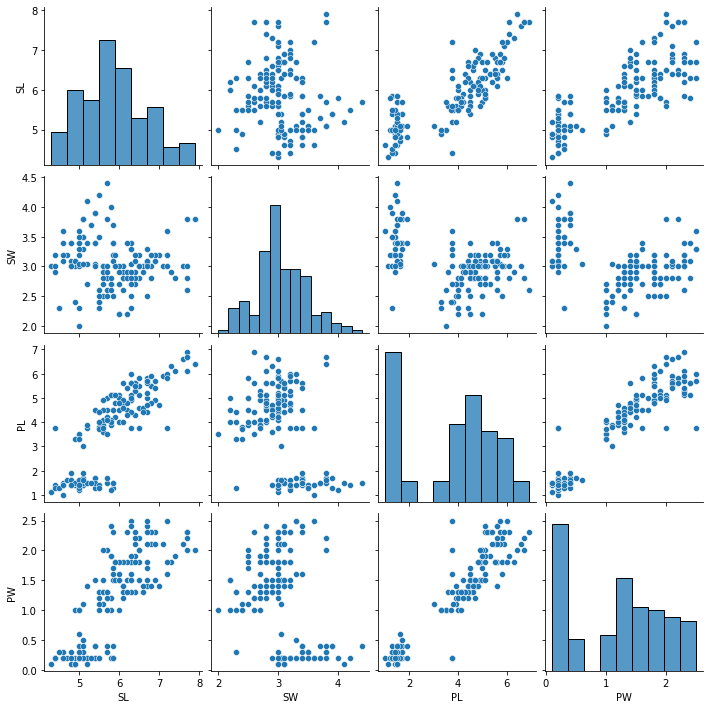

In [16]:
sns.pairplot(data)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa697e79310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa696a24610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa696a35ad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa696a0eed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa696b2f690>,
  <matplotlib.lines.Line2D at 0x7fa696a24a10>]}

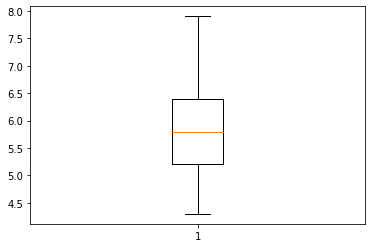

In [17]:
# we can check for outliers in our data 

plt.boxplot(data["SL"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa694cf9fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa694d0a050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa694d130d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa694d0ab10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa694d02590>,
  <matplotlib.lines.Line2D at 0x7fa694d02ad0>]}

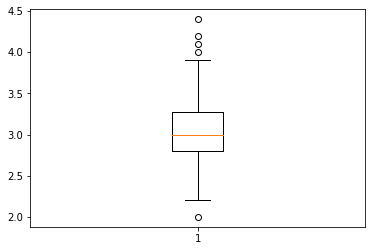

In [18]:
plt.boxplot(data["SW"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa694ceb890>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa694cee8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa694c77910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa694c773d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa694cebe10>,
  <matplotlib.lines.Line2D at 0x7fa694cee390>]}

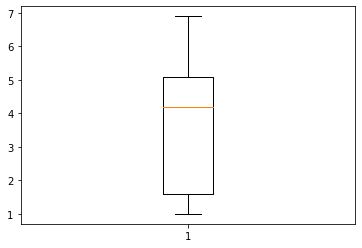

In [19]:
plt.boxplot(data["PL"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa694c5a7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa694c5f810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa694c66850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa694c66310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa694c5ad50>,
  <matplotlib.lines.Line2D at 0x7fa694c5f2d0>]}

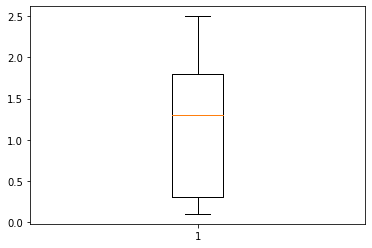

In [20]:
plt.boxplot(data["PW"])

**From the four box plots we can see our colum "SW" have some outliers , we can remove that .**

In [21]:
# we are finding the iQR , upper and lower limit
Q1 = np.percentile(data["SW"] , 25 , interpolation ="midpoint")
Q2 = np.percentile(data["SW"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(data["SW"] , 75 , interpolation ="midpoint")

IQR = Q3 -Q1
print("IQR is :" , IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print("lower_limit:" , lower_limit)
print("upper_limit :" , upper_limit)

IQR is : 0.4500000000000002
lower_limit: 2.1249999999999996
upper_limit : 3.9250000000000003


In [22]:
# we are finding the outliers
outlier = []
for x in data["SW"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)

print("outliers:" , outlier)

outliers: [4.0, 4.4, 4.1, 4.2, 2.0]


In [23]:
# we remove the outliers which are > upper limit and < lower limit 
index1 =data["SW"] > upper_limit
data.drop(data.loc[index1].index , inplace = True)

index2 = data["SW"] < lower_limit
data.drop(data.loc[index2].index, inplace = True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [25]:
data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.823017,1.226897
std,0.816690,0.374355,1.709115,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


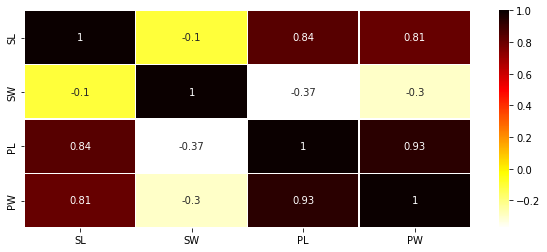

In [26]:
# We can do a corrmatrix to find out which columns have high correlation
corrmatrix = data.corr()
plt.subplots(figsize = (10,4))
sns.heatmap(corrmatrix , annot =True , linewidth = 0.2,cmap="hot_r")

By checking the above Corrmatrix we can see PL and PW have high correlation so we can drop on of these .

In [27]:
data1 = data.drop(["PL"], axis =1)

In [28]:
data1.columns

Index(['SL', 'SW', 'PW', 'Classification'], dtype='object')

In [29]:
y = data1["Classification"]

X = data1.drop(["Classification"] , axis = 1)



## 3. Find out which classification model gives the best result to predict irisspecies.(also do random forest algorithm)

### **Logistic regression**

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , random_state = 42 , test_size =0.2)

from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = logit_model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix ,accuracy_score , precision_score , f1_score

In [33]:
print("accuracy :" , accuracy_score(y_test , y_pred))
print("f1 score :" ,f1_score(y_test ,y_pred ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred , average="weighted"))

accuracy : 0.9310344827586207
f1 score : 0.9310344827586207
precision score :  0.9435736677115988


In [34]:
confusion_matrix(y_test , y_pred)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 2, 9]])

accuracy : 0.9310344827586207
f1 score : 0.9310344827586207
precision score :  0.9435736677115988

In [35]:
#now lets try KNN model

### **KNN model**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
#first we have to find optimal k value 
#total data is 145 so k value will be in the range sqrt of 145 

a = np.sqrt(data1["SL"].count())
print(a)

12.041594578792296


In [38]:
X =X.astype("int64")

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SL      145 non-null    int64
 1   SW      145 non-null    int64
 2   PW      145 non-null    int64
dtypes: int64(3)
memory usage: 4.5 KB


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y , random_state = 42 , test_size =0.2)

In [41]:

acc_values = []
neighbors = np.arange(3,13,2)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k , metric="minkowski")
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  acc_values.append(acc)

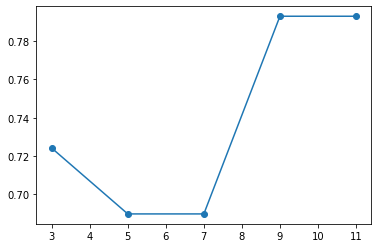

In [42]:
#now plot the sccuracy values in a graph
plt.plot(neighbors , acc_values , "o-")

In [43]:
#we can see value 11 is giving more accuracy 

In [44]:
classifier = KNeighborsClassifier(n_neighbors = 11 , metric="minkowski")
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred))
print("f1 score :" ,f1_score(y_test ,y_pred ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred , average="weighted"))

accuracy : 0.7931034482758621
f1 score : 0.7801724137931034
precision score :  0.8758620689655172


### **We can see our scores are lesser than Logistic model**

### **SVM model**

In [45]:
# Lets try SVM

from sklearn.svm import SVC
svm_linear = SVC(kernel ="linear")
svm_linear.fit(X_train,y_train)
y_predict = svm_linear.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_predict))
print("f1 score :" ,f1_score(y_test ,y_predict ,average="weighted"))
print("precision score : " , precision_score(y_test,y_predict , average="weighted"))

accuracy : 0.8620689655172413
f1 score : 0.859282479972135
precision score :  0.9045092838196286


## **The scores are improved but still logistic model is better**

### **Decision Tree**


In [46]:
# lets try decision tree

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)
y_pred_dt = dt_model.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred_dt))
print("f1 score :" ,f1_score(y_test ,y_pred_dt ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred_dt , average="weighted"))

accuracy : 0.8620689655172413
f1 score : 0.859282479972135
precision score :  0.9045092838196286


### **We see our scores are still lower than Logistci model**

### **Random Forest Algorithm**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred_rf))
print("f1 score :" ,f1_score(y_test ,y_pred_rf ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred_rf , average="weighted"))

accuracy : 0.8275862068965517
f1 score : 0.8209718670076726
precision score :  0.8891625615763546


In [48]:
# lets try Feature immportance

pd.Series(rf.feature_importances_ , index =X.columns).sort_values(ascending=False)*100

PW    59.682621
SL    31.244684
SW     9.072695
dtype: float64

In [49]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

print("accuracy :" , accuracy_score(y_test , y_pred_gb))
print("f1 score :" ,f1_score(y_test ,y_pred_gb ,average="weighted"))
print("precision score : " , precision_score(y_test,y_pred_gb , average="weighted"))

accuracy : 0.8620689655172413
f1 score : 0.859282479972135
precision score :  0.9045092838196286


### **Out of all the mdoels we can see Logistic regression performs best . So we can use Logistic regression for this problem .**